In [ ]:
!pip install pandas
import pandas as pd
!pip install sklearn
import sklearn as sk
!pip install matplotlib
import matplotlib as plt
import seaborn as sns
import csv
from google.colab import files
import re
from google.colab import drive
drive.mount('/content/drive')

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.
Mounted at /content/drive


In [ ]:
# Load bank data from CSV files in Google Drive
data = pd.read_csv("/content/drive/MyDrive/bank_marketing_dataset.csv")
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


### EDA

In [ ]:
# First let's display the first few rows to understand data's structure
pd.set_option('display.max_rows', None)
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [ ]:
# Summary stats for numerical features
data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [ ]:
# Distribution of categorical features
categorical_features = data.select_dtypes(include=['object']).columns
data[categorical_features].describe()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,subscribed
count,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,10422,24928,12168,32588,21576,33950,26144,13769,8623,35563,36548


In [ ]:
# Checking for missing values
data.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
subscribed        0
dtype: int64

In [ ]:
# Use seaborn whitegrid style for plots
sns.set_style("whitegrid")

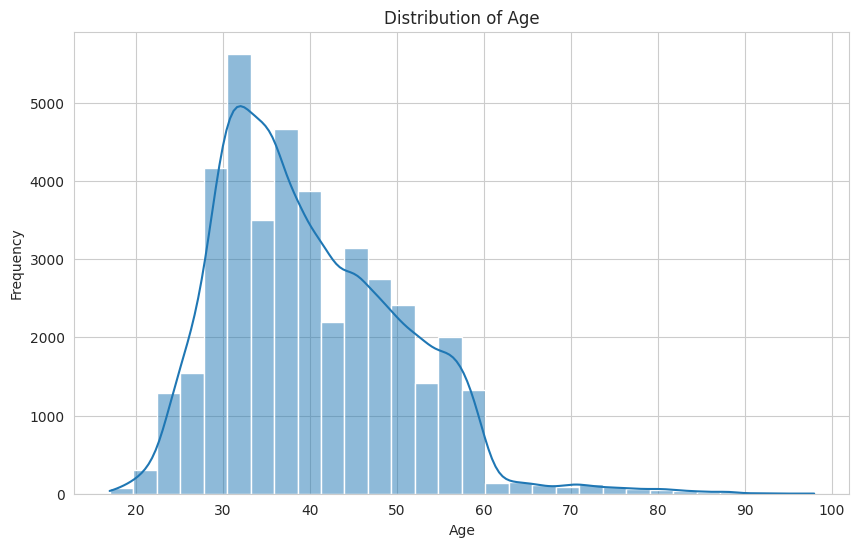

In [ ]:
# Have to load pyplot
import matplotlib.pyplot as plt

# Age
plt.figure(figsize=(10, 6))
sns.histplot(data['age'], bins=30, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

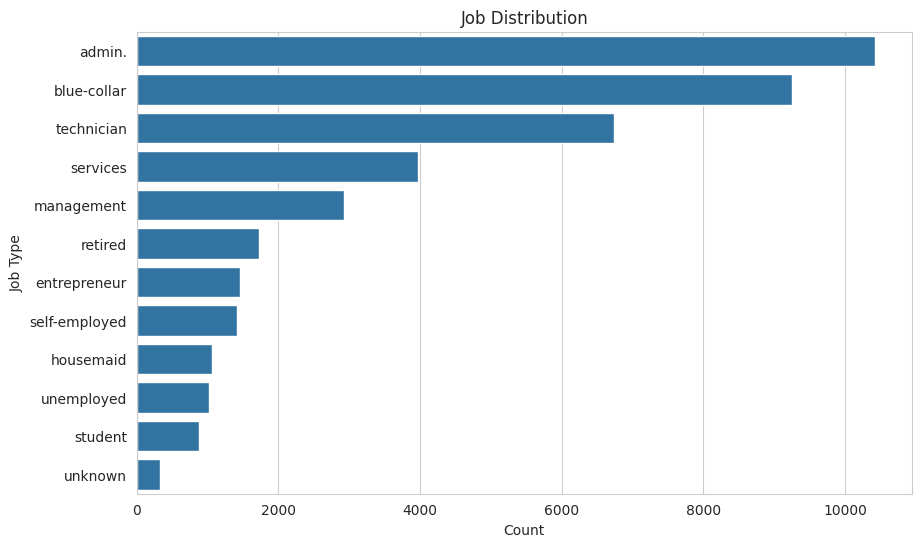

In [ ]:
# Job Type
plt.figure(figsize=(10, 6))
sns.countplot(y=data['job'], order = data['job'].value_counts().index)
plt.title('Job Distribution')
plt.xlabel('Count')
plt.ylabel('Job Type')
plt.show()

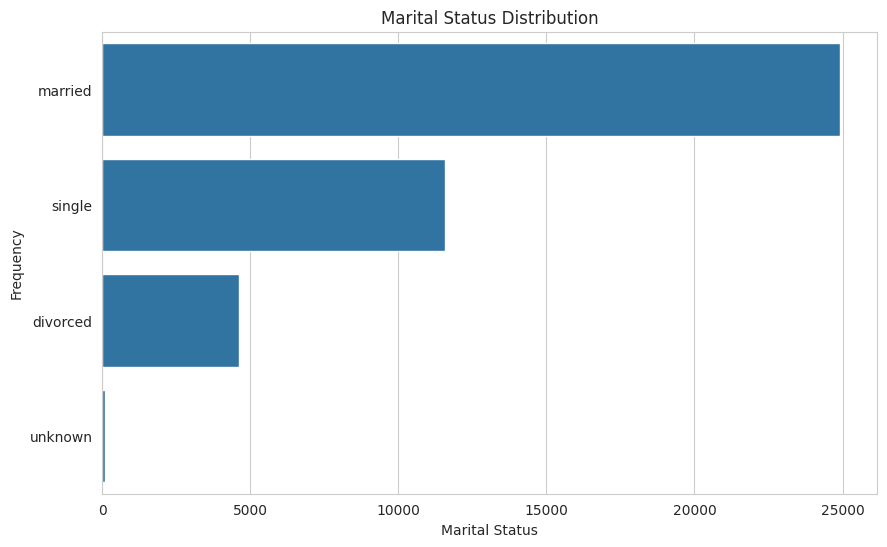

In [ ]:
# Marital Status
plt.figure(figsize=(10, 6))
sns.countplot(data['marital'], order = data['marital'].value_counts().index)
plt.title('Marital Status Distribution')
plt.xlabel('Marital Status')
plt.ylabel('Frequency')
plt.show()

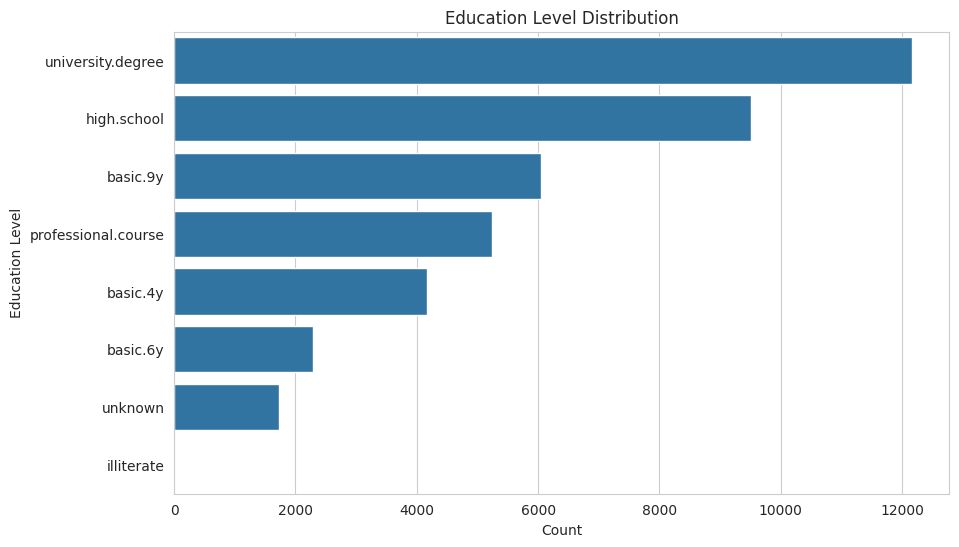

In [ ]:
# Education
plt.figure(figsize=(10, 6))
sns.countplot(y=data['education'], order = data['education'].value_counts().index)
plt.title('Education Level Distribution')
plt.xlabel('Count')
plt.ylabel('Education Level')
plt.show()

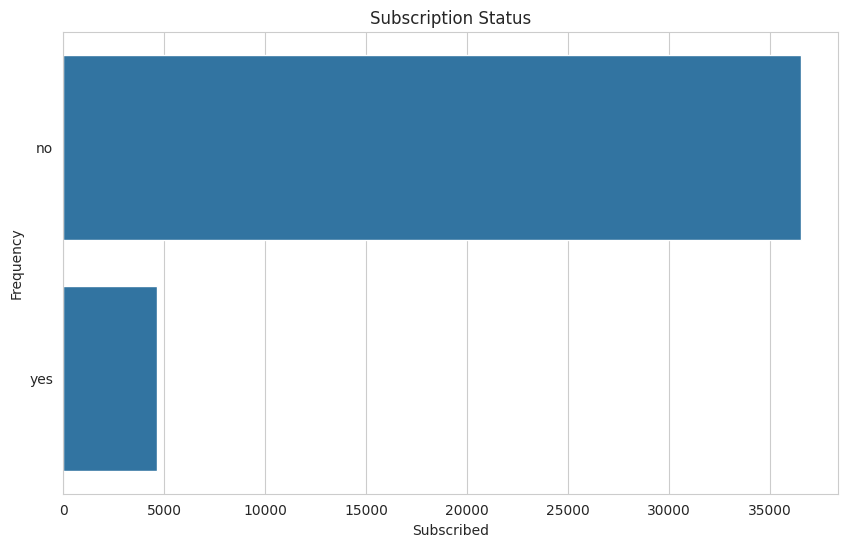

In [ ]:
# Subscription Status
plt.figure(figsize=(10, 6))
sns.countplot(data['subscribed'])
plt.title('Subscription Status')
plt.xlabel('Subscribed')
plt.ylabel('Frequency')
plt.show()

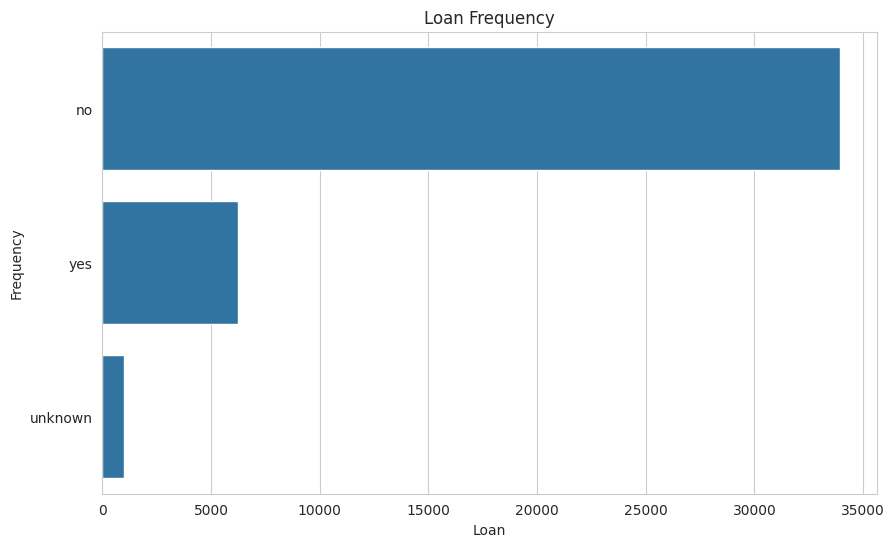

In [ ]:
# Loan
plt.figure(figsize=(10, 6))
sns.countplot(data['loan'])
plt.title('Loan Frequency')
plt.xlabel('Loan')
plt.ylabel('Frequency')
plt.show()

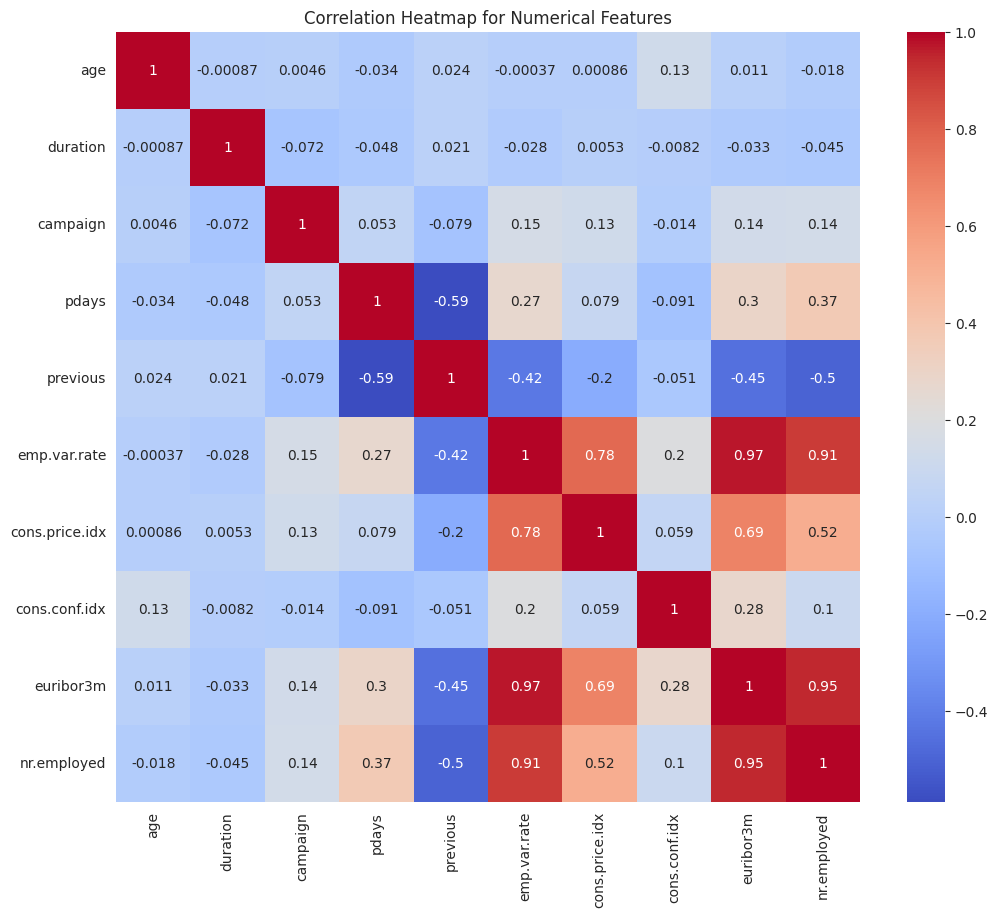

In [ ]:
# Correlation Heatmap
plt.figure(figsize=(12, 10))
correlation_matrix = data.select_dtypes(include=['int64', 'float64']).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap for Numerical Features')
plt.show()

### Preprocessing

In [ ]:
# There are no missing values as seen before
data.isnull().sum()
# This means theres no need for imputation

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
subscribed        0
dtype: int64

In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
import numpy as np

# Identify numerical and categorical columns
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = data.select_dtypes(include=['object']).columns.drop('subscribed')  # Exclude target variable (CHANGE WHEN WE KNOW WHATS TARGET)

In [ ]:
# Numerical data preprocessing
# Directly scale numerical features since there are no missing values
scaler = StandardScaler()
data_num_scaled = scaler.fit_transform(data[numerical_cols])

In [ ]:
# Categorical data preprocessing
# Again directly apply one-hot encoding since there are no missing values
onehot = OneHotEncoder(handle_unknown='ignore')
data_cat_onehot = onehot.fit_transform(data[categorical_cols]).toarray()

In [ ]:
# Combine numerical and categorical features back into dataset
X_preprocessed = np.hstack((data_num_scaled, data_cat_onehot))

In [ ]:
# Set target variable as y
y = data['subscribed'].map({'yes': 1, 'no': 0})  # Converts target variable to numerical

In [ ]:
# Split data into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X_preprocessed, y, train_size=0.8, test_size=0.2, random_state=0)

In [ ]:
# Check shape of the directly preprocessed training data to make sure its good
X_train.shape

(32950, 63)

### Preprocessing with Pipelines

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [ ]:
# Preprocessing for numerical data: Scaling only
numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

In [ ]:
# Preprocessing for categorical data: OneHotEncoding only
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [ ]:
# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

In [ ]:
# Set target variable as y
y = data['subscribed'].map({'yes': 1, 'no': 0})  # Converts target variable to numerical

In [ ]:
# Split data into training and validation sets
X_train, X_valid_pi, y_train, y_valid = train_test_split(data.drop('subscribed', axis=1), y, train_size=0.8, test_size=0.2,
                                                      random_state=0)

In [ ]:
# Apply preprocessing to data
X_train_pipeline = preprocessor.fit_transform(X_train)
X_valid_pipeline = preprocessor.transform(X_valid)

In [ ]:
# Check shape of pipeline training data
X_train_pipeline.shape

(32950, 63)